# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020

In [1]:
#%matplotlib inline
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
%%bash
head ../../data/befkbhalderstatkode.csv

AAR,BYDEL,ALDER,STATKODE,PERSONER
2015,1,0,5100,614
2015,1,0,5104,2
2015,1,0,5106,1
2015,1,0,5110,1
2015,1,0,5120,4
2015,1,0,5126,1
2015,1,0,5130,5
2015,1,0,5140,3
2015,1,0,5150,5


### Open the file './data/befkbhalderstatkode.csv'

In [4]:
filename = './data/befkbhalderstatkode.csv'
filename1 = './../../data/befkbhalderstatkode.csv'

### Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [5]:
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(type(bef_stats_df),' of size: ',bef_stats_df.size)
print('The skip_header=1 means that we have only the data\n\nfirst line:\n',bef_stats_df[0],'\nlast line\n',bef_stats_df[len(bef_stats_df)-1])

<class 'numpy.ndarray'>  of size:  2712585
The skip_header=1 means that we have only the data

first line:
 [2015    1    0 5100  614] 
last line
 [1992   99   93 5100    1]


In [6]:
dd = bef_stats_df
mask = (dd[:,0] == 2015) # filter only rows that has value = 2015 in column 0
dd[mask]

array([[2015,    1,    0, 5100,  614],
       [2015,    1,    0, 5104,    2],
       [2015,    1,    0, 5106,    1],
       ...,
       [2015,   99,   82, 5100,    1],
       [2015,   99,   86, 5289,    1],
       [2015,   99,   90, 5289,    1]], dtype=uint64)

In [7]:
print(dd[mask])

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [2015   99   82 5100    1]
 [2015   99   86 5289    1]
 [2015   99   90 5289    1]]


In [8]:
print('all the areas',set(dd[:,1]))

all the areas {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99}


In [9]:
print('People in each area',list(dd[mask][:,4]))

People in each area [614, 2, 1, 1, 4, 1, 5, 3, 5, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 540, 3, 2, 3, 4, 3, 1, 1, 2, 1, 3, 2, 4, 3, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 485, 1, 1, 3, 4, 1, 1, 3, 1, 3, 4, 5, 1, 1, 2, 1, 5, 1, 1, 1, 469, 1, 1, 1, 2, 4, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 1, 1, 2, 1, 452, 1, 1, 1, 1, 4, 1, 1, 2, 4, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 434, 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 411, 6, 2, 3, 2, 1, 1, 3, 1, 2, 1, 7, 1, 1, 1, 1, 1, 375, 3, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 386, 1, 1, 2, 1, 1, 1, 4, 3, 3, 1, 1, 1, 7, 1, 1, 1, 1, 336, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 404, 1, 2, 1, 1, 1, 4, 3, 1, 2, 1, 1, 1, 353, 1, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 342, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 1, 2, 1, 364, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 318, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 367, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 355, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 360, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 3, 1, 1, 1, 1, 378, 1, 1, 2, 1, 4, 1,

In [10]:
print('sum all the cph areas\n',np.sum(dd[mask][:,4]))

sum all the cph areas
 580295


In [11]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
print(neighb)

{1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}


In [12]:
mask = (dd[:,0] == 2015) & (dd[:,1] == 1)
print(dd[mask])
print('sum all the people in area 1\n',np.sum(dd[mask][:,4]))

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [2015    1  102 5100    2]
 [2015    1  103 5100    1]
 [2015    1  106 5100    1]]
sum all the people in area 1
 51937


### Find out how many people lived in each of the 11 areas in 2015

In [13]:
#print(neighb.keys())
people_list = []
area_list = []
concat_list = []

for area in neighb:
    #print(type(area))
    #print(area)
    mask = (dd[:,0] == 2015) & (dd[:,1] == area)
    population = np.sum(dd[mask][:,4])
    people_list.append(population)
    area_list.append(area)
    concat_list.append([int(population), int(area)])
    
print(people_list)
print(area_list)
print(concat_list)

[51937, 75113, 78802, 61623, 51727, 39537, 43908, 53604, 55205, 64967, 3872]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99]
[[51937, 1], [75113, 2], [78802, 3], [61623, 4], [51727, 5], [39537, 6], [43908, 7], [53604, 8], [55205, 9], [64967, 10], [3872, 99]]


### Make a bar plot to show the size of each city area from the smallest to the largest

In [14]:
sorted_concat_list = sorted(concat_list,key=lambda l:l[0], reverse=False)
print(sorted_concat_list)


[[3872, 99], [39537, 6], [43908, 7], [51727, 5], [51937, 1], [53604, 8], [55205, 9], [61623, 4], [64967, 10], [75113, 2], [78802, 3]]


In [15]:
nympy_array = np.array(sorted_concat_list)

In [16]:
nympy_array

array([[ 3872,    99],
       [39537,     6],
       [43908,     7],
       [51727,     5],
       [51937,     1],
       [53604,     8],
       [55205,     9],
       [61623,     4],
       [64967,    10],
       [75113,     2],
       [78802,     3]])

In [17]:
population = list(nympy_array[:,0])
population

[3872, 39537, 43908, 51727, 51937, 53604, 55205, 61623, 64967, 75113, 78802]

In [18]:
areas = list(nympy_array[:,1])
areas

[99, 6, 7, 5, 1, 8, 9, 4, 10, 2, 3]

<IPython.core.display.Javascript object>


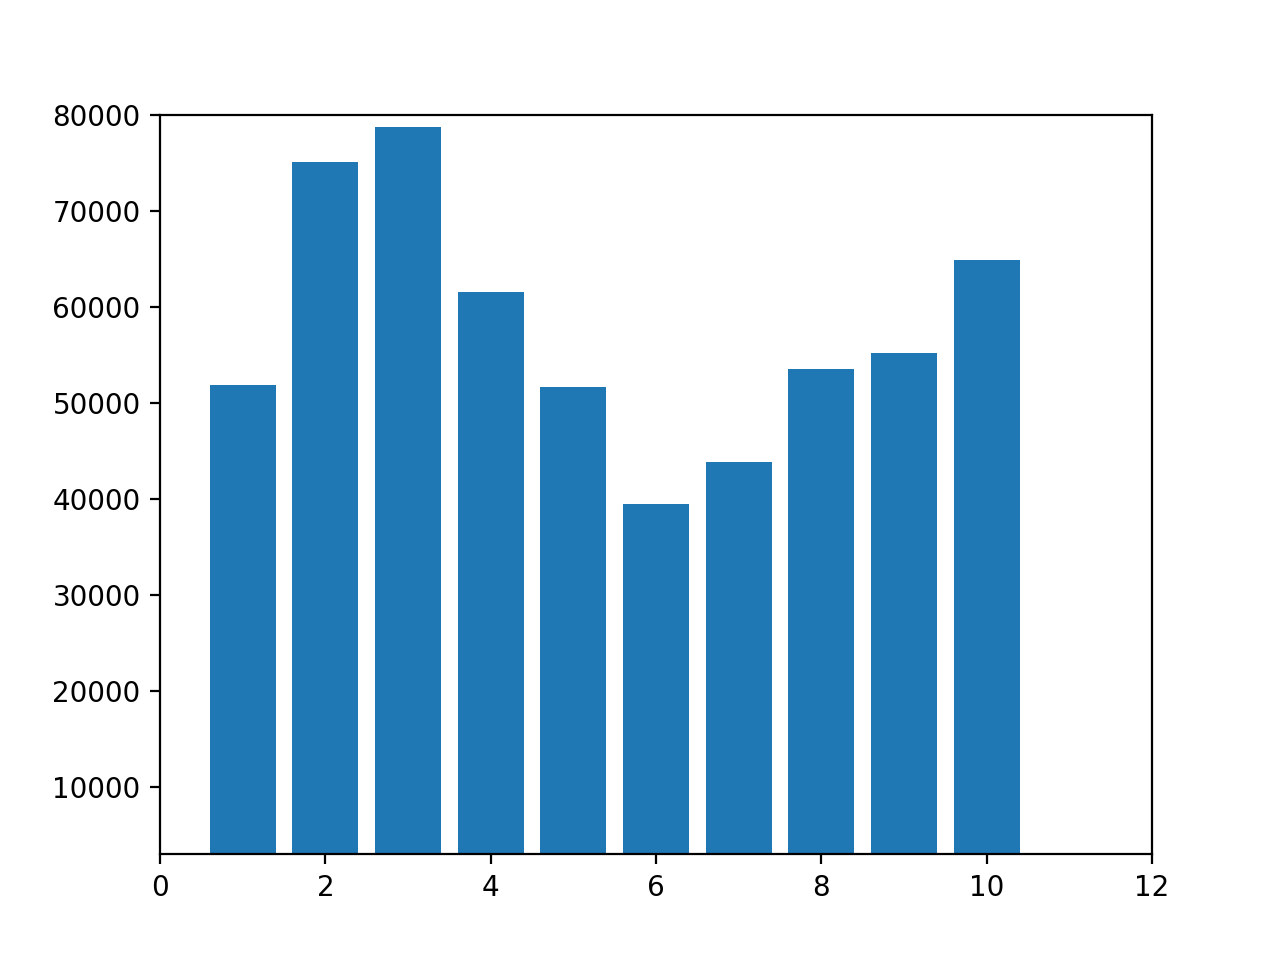

(0.0, 12.0, 3000.0, 80000.0)

In [19]:
import matplotlib.pyplot as plt
plt.bar(areas, population)
plt.axis([0,12,3000,80000])

In [20]:
print(areas)
print(population)

[99, 6, 7, 5, 1, 8, 9, 4, 10, 2, 3]
[3872, 39537, 43908, 51727, 51937, 53604, 55205, 61623, 64967, 75113, 78802]


<IPython.core.display.Javascript object>


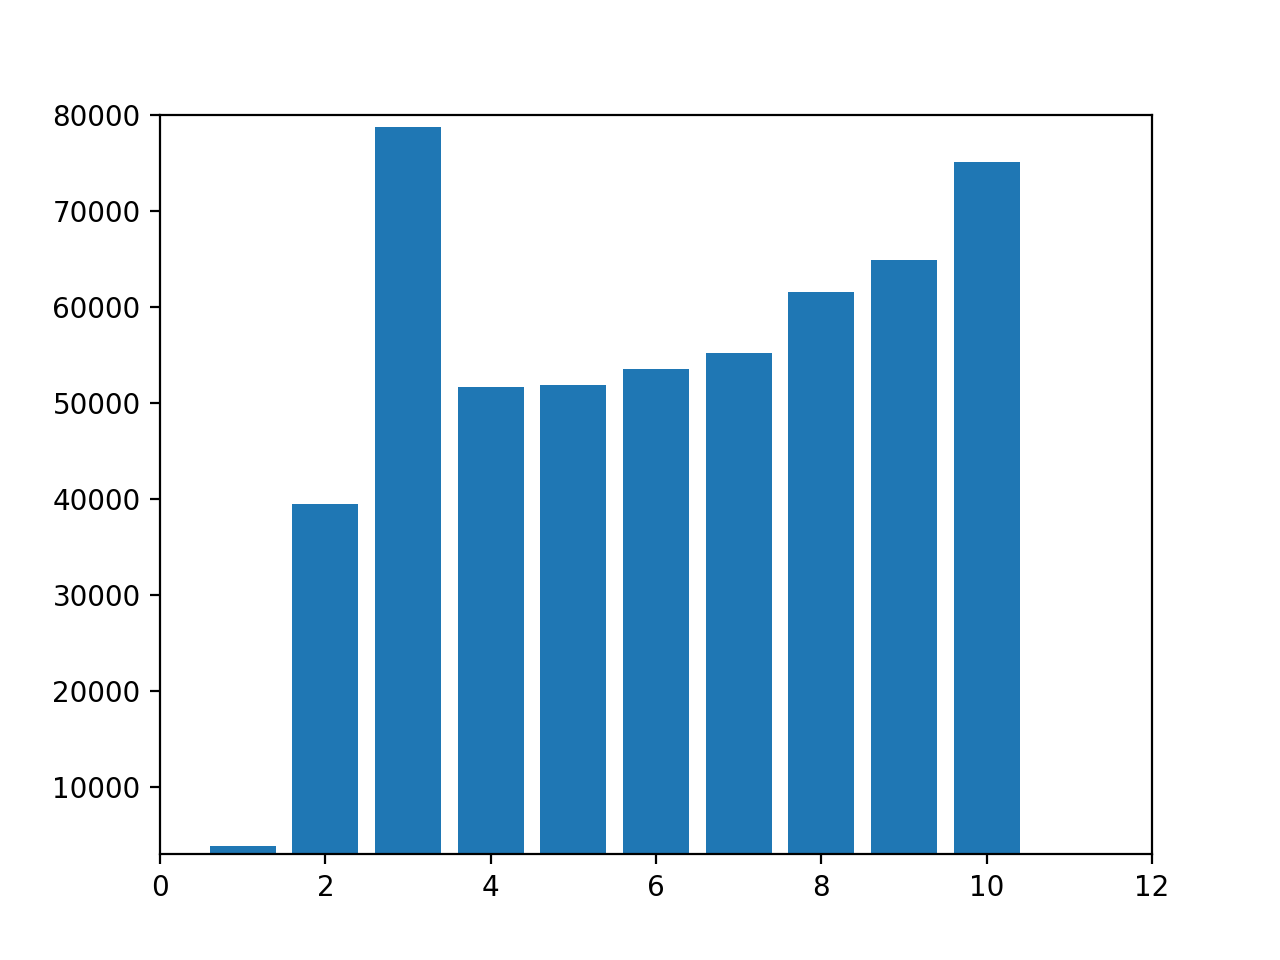

(0.0, 12.0, 3000.0, 80000.0)

In [21]:
plt.figure()
plt.bar(list(set(nympy_array[:,1])), list(nympy_array[:,0]))
plt.axis([0,12,3000,80000])

In [22]:
print(list(set(nympy_array[:,1])))

[1, 2, 99, 4, 5, 6, 7, 8, 9, 10, 3]


In [23]:
print(list(nympy_array[:,0]))

[3872, 39537, 43908, 51727, 51937, 53604, 55205, 61623, 64967, 75113, 78802]


<IPython.core.display.Javascript object>


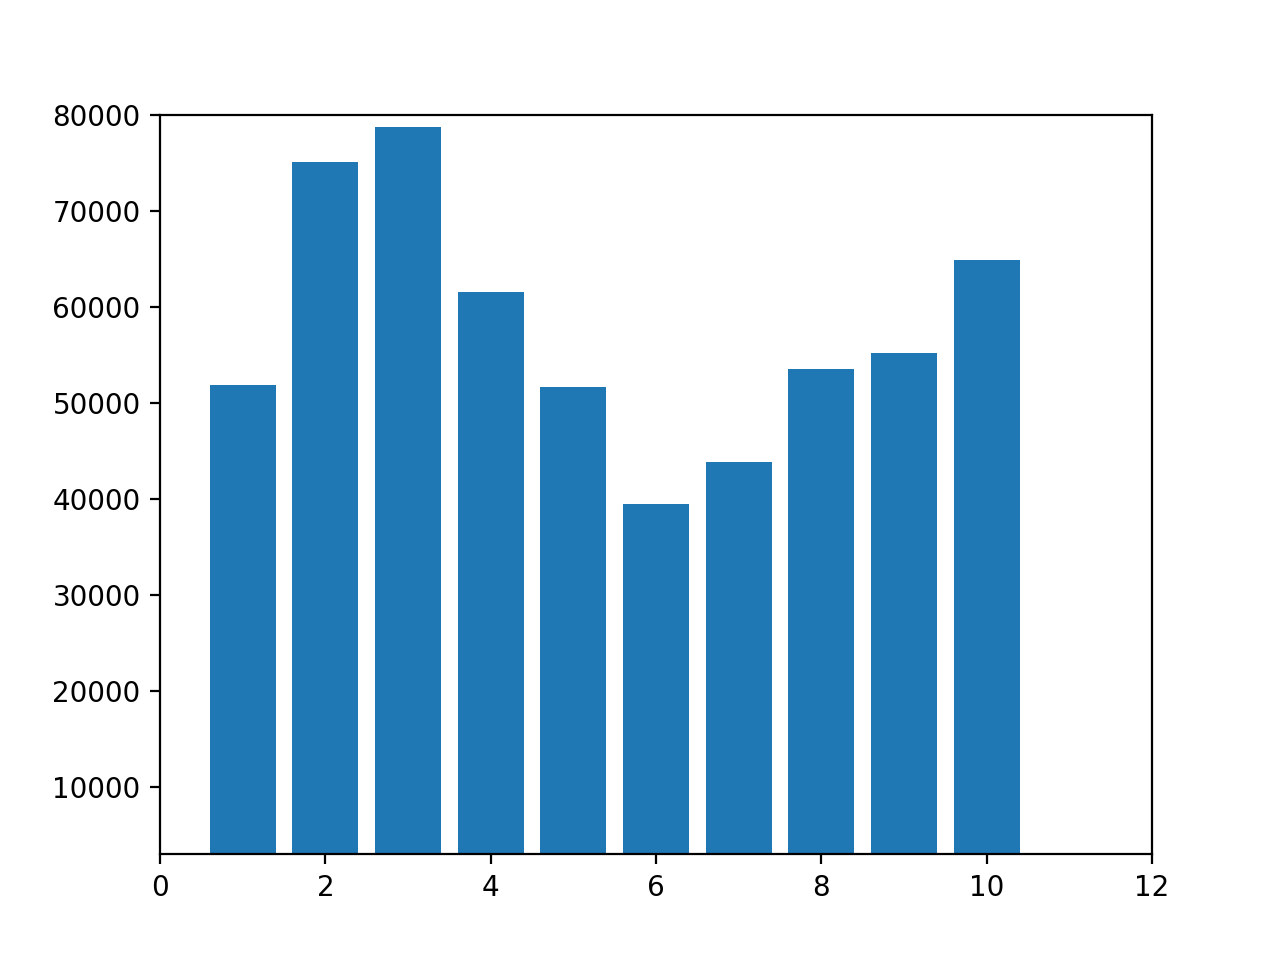

(0.0, 12.0, 3000.0, 80000.0)

In [24]:
plt.figure()
plt.bar(list(nympy_array[:,1]), list(nympy_array[:,0]))
plt.axis([0,12,3000,80000])

In [25]:
print(list(nympy_array[:,1]))

[99, 6, 7, 5, 1, 8, 9, 4, 10, 2, 3]


In [26]:
print(list(nympy_array[:,0]))

[3872, 39537, 43908, 51727, 51937, 53604, 55205, 61623, 64967, 75113, 78802]


In [27]:
#print(neighb.keys())
population_dict = {}

for area_code, area in neighb.items():
    #print(area_code)
    #print(area)
    mask = (dd[:,0] == 2015) & (dd[:,1] == area_code)
    population = np.sum(dd[mask][:,4])
    population_dict[area] = population

population_dict
    

{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

In [28]:
sorted_dict = dict(sorted(population_dict.items(), key=lambda item: item[1]))

In [29]:
sorted_dict

{'Udenfor': 3872,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Valby': 51727,
 'Indre By': 51937,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Vesterbro/Kgs. Enghave': 61623,
 'Amager Vest': 64967,
 'Østerbro': 75113,
 'Nørrebro': 78802}

<IPython.core.display.Javascript object>


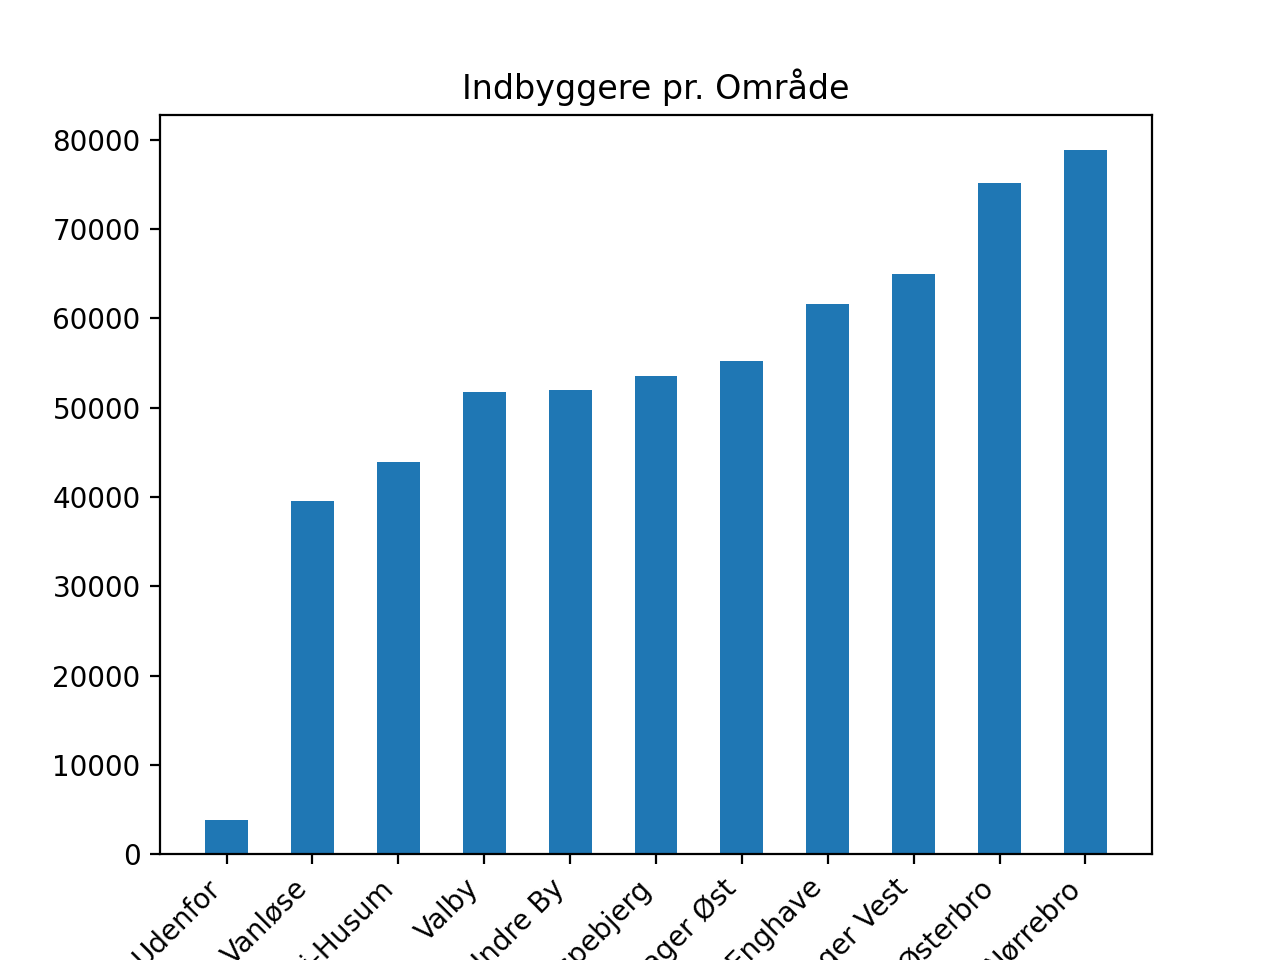

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [30]:
plt.figure()
plt.bar(sorted_dict.keys(), sorted_dict.values(), width=0.5, linewidth=0, align='center')
plt.title('Indbyggere pr. Område', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')



### Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [31]:
dd = bef_stats_df
mask = (dd[:,0] == 2015) & (dd[:,1] != 99) & (dd[:,2] > 65)# filter only rows that has value = 2015 in column 0
dd[mask]

array([[2015,    1,   66, 5100,  519],
       [2015,    1,   66, 5104,    1],
       [2015,    1,   66, 5106,    1],
       ...,
       [2015,   10,  102, 5100,    3],
       [2015,   10,  103, 5100,    2],
       [2015,   10,  104, 5100,    1]], dtype=uint64)

In [32]:
print("People above 65 years living in Copenhagen in 2015: {} people".format(np.sum(dd[mask][:,4])))

People above 65 years living in Copenhagen in 2015: 55700 people


### How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

In [33]:
country_codes = {0: 'Uoplyst (1)', 5001: 'Uoplyst (2)', 5100: 'Danmark', 5101: 'Grønland', 
                 5102: 'Udlandet uoplyst', 5103: 'Statsløs', 5104: 'Finland', 
                 5105: 'Island, ligeret dansk', 5106: 'Island', 5107: 'Liechtenstein', 
                 5108: 'Luxembourg', 5109: 'Monaco', 5110: 'Norge', 5114: 'Europa uoplyst', 
                 5115: 'Kongelig', 5120: 'Sverige', 5122: 'Albanien', 5124: 'Andorra', 
                 5126: 'Belgien', 5128: 'Bulgarien', 5129: 'Tjekkoslovakiet', 
                 5130: 'Frankrig', 5134: 'Grækenland', 5140: 'Nederlandene', 
                 5142: 'Irland', 5150: 'Italien', 5151: 'Serbien og Montenegro', 
                 5152: 'Jugoslavien', 5153: 'Malta', 5154: 'Polen', 5156: 'Portugal', 
                 5158: 'Rumænien', 5159: 'San Marino', 5160: 'Schweiz', 
                 5162: 'Sovjetunionen', 5164: 'Spanien', 5170: 'Storbritannien', 
                 5172: 'Tyrkiet', 5174: 'Ungarn', 5176: 'Vatikanstaten', 5180: 'Tyskland', 
                 5182: 'Østrig', 5199: 'Europa uoplyst', 5202: 'Algeriet', 5204: 'Angola', 
                 5207: 'Botswana', 5213: 'Burundi', 5214: 'Etiopien', 5215: 'Comorerne', 
                 5216: 'Eritrea', 5222: 'Gambia', 5228: 'Ghana', 5230: 'Ækvatorialguinea', 
                 5231: 'Guinea-Bissau', 5232: 'Guinea', 5233: 'Kap Verde', 5234: 'Kenya', 
                 5235: 'Lesotho', 5236: 'Liberia', 5238: 'Libyen', 5240: 'Mozambique', 
                 5242: 'Madagaskar', 5243: 'Mali', 5244: 'Marokko', 5245: 'Mauritius', 
                 5246: 'Nigeria', 5247: 'Namibia', 5248: 'Marshalløerne', 
                 5255: 'Sierra Leone', 5258: 'Sudan', 5259: 'Swaziland', 5260: 'Sydsudan', 
                 5262: 'Sydafrika', 5266: 'Tanzania', 5268: 'Tunesien', 5269: 'Uganda', 
                 5272: 'Egypten', 5273: 'Tuvalu', 5274: 'Kiribati', 5275: 'Vanuatu', 
                 5276: 'Centralafrikanske Republik', 5277: 'Cameroun', 
                 5278: 'Congo, Demokratiske Republik', 5279: 'Congo, Republikken', 
                 5281: 'Benin', 5282: 'Elfenbenskysten', 5283: 'Gabon', 5284: 'Mauretanien', 
                 5285: 'Niger', 5287: 'Rwanda', 5288: 'Senegal', 5289: 'Somalia', 
                 5292: 'Tchad', 5293: 'Togo', 5294: 'Burkina Faso', 5295: 'Zimbabwe', 
                 5296: 'Zambia', 5297: 'Malawi', 5298: 'Seychellerne', 
                 5299: 'Afrika uoplyst', 5302: 'Argentina', 5303: 'Bahamas', 
                 5304: 'Bolivia', 5305: 'Barbados', 5306: 'Brasilien', 5308: 'Guyana', 
                 5309: 'Antigua og Barbuda', 5310: 'Nauru', 
                 5311: 'Skt. Vincent og Grenadinerne', 5314: 'Canada', 5316: 'Chile', 
                 5318: 'Colombia', 5319: 'Syd- og Mellemamerika uoplyst', 
                 5322: 'Costa Rica', 5324: 'Cuba', 5326: 'Dominikanske Republik', 
                 5328: 'Ecuador', 5338: 'Guatemala', 5339: 'Grenada', 5342: 'Haiti', 
                 5344: 'Surinam', 5345: 'Dominica', 5347: 'Skt. Lucia', 5348: 'Honduras', 
                 5352: 'Jamaica', 5354: 'Mexico', 5356: 'Nicaragua', 5358: 'Panama', 
                 5364: 'Paraguay', 5366: 'Peru', 5372: 'El Salvador', 
                 5374: 'Trinidad og Tobago', 5376: 'Uruguay', 5390: 'USA', 
                 5392: 'Venezuela', 5395: 'Vestindiske Øer', 5397: 'Nordamerika uoplyst', 
                 5398: 'Syd- og Mellemamerika uoplyst', 5402: 'Yemen', 
                 5403: 'Forenede Arabiske Emirater', 5404: 'Afghanistan', 5406: 'Bahrain', 
                 5408: 'Bhutan', 5410: 'Bangladesh', 5412: 'Brunei', 5414: 'Myanmar', 
                 5416: 'Cambodja', 5418: 'Sri Lanka', 5422: 'Cypern', 5424: 'Taiwan', 
                 5432: 'Indien', 5434: 'Indonesien', 5435: 'Østtimor', 5436: 'Irak', 
                 5438: 'Iran', 5442: 'Israel', 5444: 'Japan', 5446: 'Jordan', 5448: 'Kina', 
                 5452: 'Kuwait', 5454: 'Laos', 5456: 'Libanon', 5457: 'Maldiverne', 
                 5458: 'Malaysia', 5459: 'Mongoliet', 5462: 'Oman', 5464: 'Nepal', 
                 5466: 'Nordkorea', 5468: 'Vietnam (1)', 5471: 'Asien uoplyst', 
                 5472: 'Pakistan', 5474: 'Filippinerne', 5478: 'Saudi-Arabien', 
                 5482: 'Singapore', 5484: 'Sydkorea', 5486: 'Syrien', 
                 5487: 'Mellemøsten uoplyst', 5488: 'Vietnam (2)', 5492: 'Thailand', 
                 5496: 'Qatar', 5499: 'Asien uoplyst', 5502: 'Australien', 5505: 'Tonga', 
                 5508: 'Fiji', 5514: 'New Zealand', 5522: 'Samoa', 5525: 'Djibouti', 
                 5526: 'Belize', 5534: 'Papua Ny Guinea', 5599: 'Øer i Stillehavet', 
                 5607: 'Estland', 5609: 'Letland', 5611: 'Litauen', 
                 5621: 'Sao Tome og Principe', 5623: 'Salomonøerne', 
                 5625: 'Skt. Kitts og Nevis', 5700: 'Rusland', 5704: 'Ukraine', 
                 5706: 'Hviderusland', 5708: 'Armenien', 5710: 'Aserbajdsjan', 
                 5712: 'Moldova', 5714: 'Usbekistan', 5716: 'Kasakhstan', 
                 5718: 'Turkmenistan', 5720: 'Kirgisistan', 5722: 'Tadsjikistan', 
                 5724: 'Georgien', 5750: 'Kroatien', 5752: 'Slovenien', 
                 5754: 'Bosnien-Hercegovina', 5756: 'Makedonien', 5757: 'Serbien', 
                 5758: 'Jugoslavien, Forbundsrepublikken', 5759: 'Montenegro', 
                 5761: 'Kosovo', 5776: 'Tjekkiet', 5778: 'Slovakiet', 5779: 'Cookøerne', 
                 5800: 'Land ukendt (2)', 5901: 'Færøerne uoplyst', 5902: 'Færøerne', 
                 5999: 'Land ukendt (1)'}

In [34]:
data = dd
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"] 
old_nords = 0 
for x,y in country_codes.items(): 
    if y in nordic_countries: 
        print(x) 
        print(y) 
        mask = (data[:,0] == 2015) & (data[:,2] > 65) & (data[:,3] == x) 
        country_sum = (data[mask][0:,4].sum()) 
        print(country_sum)
        old_nords += country_sum
print("Nordiske beboere over 65 år: ",old_nords) 

# control the sum by slicing a different way
control = dd[np.isin(dd[:,3],[5101,5104,5106,5110,5120])]
control = control[(control[:,0] == 2015) & (control[:,2]>65)]
control[:,4].sum()

5101
Grønland
0
5104
Finland
72
5106
Island
33
5110
Norge
236
5120
Sverige
267
Nordiske beboere over 65 år:  608.0


608

### Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

In [35]:
# Østerbro
osterbro = dd[np.isin(dd[:,1],[2])]

In [36]:
osterbro

array([[2015,    2,    0, 5100, 1000],
       [2015,    2,    0, 5106,    3],
       [2015,    2,    0, 5110,    1],
       ...,
       [1992,    2,  100, 5100,    5],
       [1992,    2,  101, 5100,    1],
       [1992,    2,  103, 5100,    1]], dtype=uint64)

In [37]:
osterbro = osterbro[(osterbro[:,0] >= 1992) & (osterbro[:,0] <= 2015)]

In [38]:
osterbro

array([[2015,    2,    0, 5100, 1000],
       [2015,    2,    0, 5106,    3],
       [2015,    2,    0, 5110,    1],
       ...,
       [1992,    2,  100, 5100,    5],
       [1992,    2,  101, 5100,    1],
       [1992,    2,  103, 5100,    1]], dtype=uint64)

In [39]:
osterbro_population = osterbro[(osterbro[:,0] == 1992)]

In [40]:
osterbro_population

array([[1992,    2,    0, 5100,  716],
       [1992,    2,    0, 5103,    1],
       [1992,    2,    0, 5106,    4],
       ...,
       [1992,    2,  100, 5100,    5],
       [1992,    2,  101, 5100,    1],
       [1992,    2,  103, 5100,    1]], dtype=uint64)

In [41]:
osterbro_population = osterbro_population[0:,4].sum()

In [42]:
osterbro_population

62221

In [43]:
osterbro_population_dict = {}
for year in range(1992, 2016):
    #print(year)
    osterbro_population = osterbro[(osterbro[:,0] == year)]
    osterbro_population = osterbro_population[0:,4].sum()
    osterbro_population_dict[year] = osterbro_population
    
osterbro_population_dict
    

{1992: 62221,
 1993: 62583,
 1994: 63050,
 1995: 63572,
 1996: 64503,
 1997: 65856,
 1998: 66148,
 1999: 66295,
 2000: 66673,
 2001: 66877,
 2002: 67020,
 2003: 67550,
 2004: 67516,
 2005: 67671,
 2006: 67351,
 2007: 67330,
 2008: 67964,
 2009: 68769,
 2010: 69951,
 2011: 70938,
 2012: 72400,
 2013: 73388,
 2014: 74521,
 2015: 75113}

In [44]:
# vesterbro
vesterbro = dd[np.isin(dd[:,1],[4])]

In [45]:
vesterbro

array([[2015,    4,    0, 5100, 1032],
       [2015,    4,    0, 5102,    1],
       [2015,    4,    0, 5104,    2],
       ...,
       [1992,    4,   98, 5100,    3],
       [1992,    4,   99, 5100,    1],
       [1992,    4,  102, 5100,    1]], dtype=uint64)

In [46]:
vesterbro = vesterbro[(vesterbro[:,0] >= 1992) & (vesterbro[:,0] <= 2015)]

In [47]:
vesterbro

array([[2015,    4,    0, 5100, 1032],
       [2015,    4,    0, 5102,    1],
       [2015,    4,    0, 5104,    2],
       ...,
       [1992,    4,   98, 5100,    3],
       [1992,    4,   99, 5100,    1],
       [1992,    4,  102, 5100,    1]], dtype=uint64)

In [48]:
vesterbro_population = vesterbro[(vesterbro[:,0] == 1992)]

In [49]:
vesterbro_population

array([[1992,    4,    0, 5100,  481],
       [1992,    4,    0, 5103,    3],
       [1992,    4,    0, 5104,    1],
       ...,
       [1992,    4,   98, 5100,    3],
       [1992,    4,   99, 5100,    1],
       [1992,    4,  102, 5100,    1]], dtype=uint64)

In [50]:
vesterbro_population = vesterbro_population[0:,4].sum()

In [51]:
vesterbro_population

47854

In [52]:
vesterbro_population_dict = {}
for year in range(1992, 2016):
    #print(year)
    vesterbro_population = vesterbro[(vesterbro[:,0] == year)]
    vesterbro_population = vesterbro_population[0:,4].sum()
    vesterbro_population_dict[year] = vesterbro_population
    
vesterbro_population_dict

{1992: 47854,
 1993: 47589,
 1994: 47538,
 1995: 47633,
 1996: 47734,
 1997: 48275,
 1998: 49109,
 1999: 49520,
 2000: 50312,
 2001: 50756,
 2002: 51039,
 2003: 51045,
 2004: 50869,
 2005: 50643,
 2006: 50303,
 2007: 50964,
 2008: 51466,
 2009: 53351,
 2010: 55315,
 2011: 57150,
 2012: 58411,
 2013: 59211,
 2014: 60328,
 2015: 61623}

In [53]:
osterbro_population_dict.keys()

dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [54]:
osterbro_population_dict.values()

dict_values([62221, 62583, 63050, 63572, 64503, 65856, 66148, 66295, 66673, 66877, 67020, 67550, 67516, 67671, 67351, 67330, 67964, 68769, 69951, 70938, 72400, 73388, 74521, 75113])

<IPython.core.display.Javascript object>


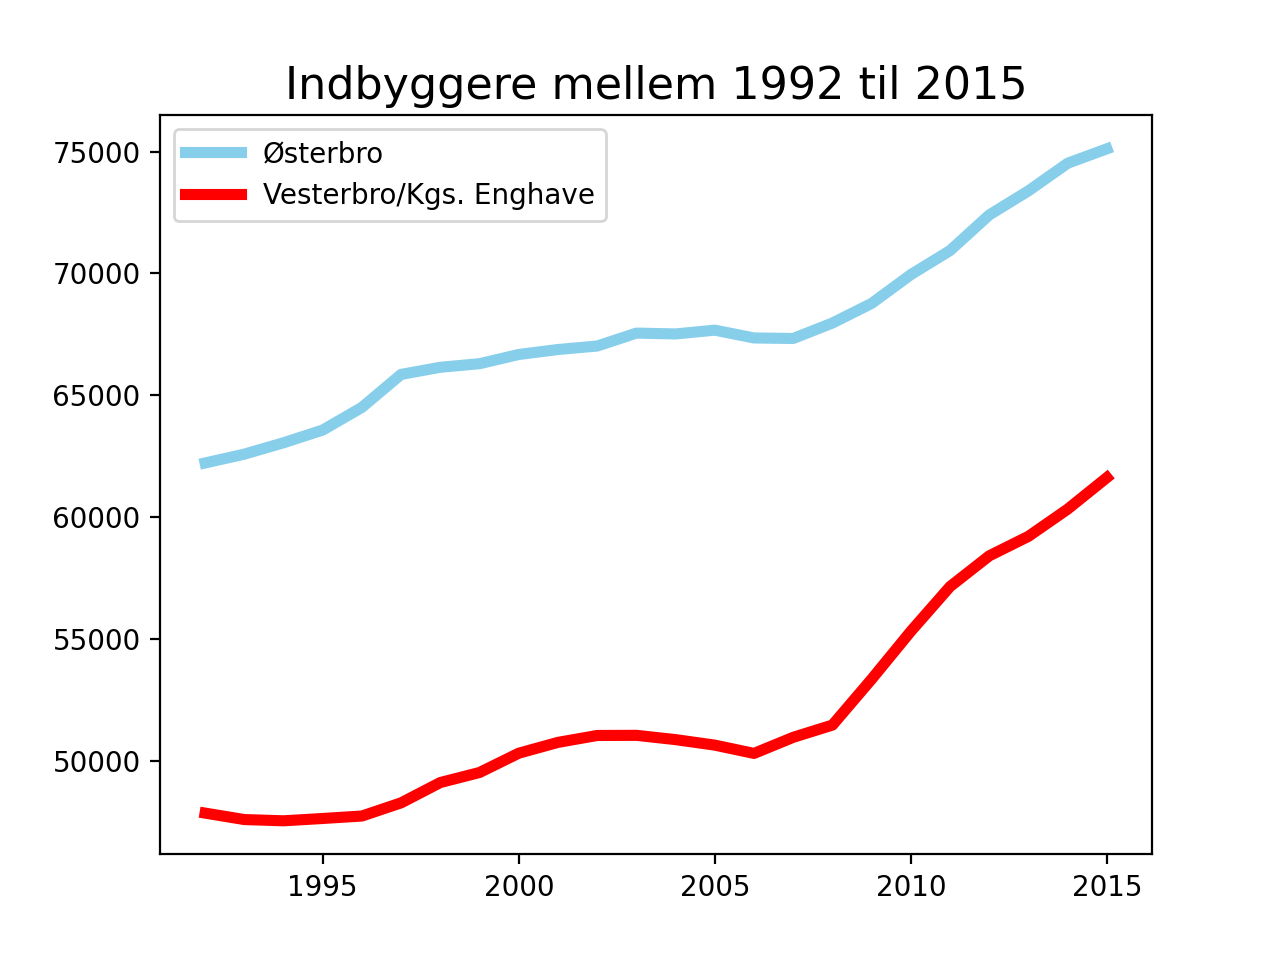

In [55]:
import pandas as pd
plt.figure()
x_values = list(osterbro_population_dict.keys())
y1 = list(osterbro_population_dict.values())
y2 = list(vesterbro_population_dict.values())
df=pd.DataFrame({'x_values': x_values,'Østerbro' : y1, 'Vesterbro/Kgs. Enghave': y2 })
 
# multiple line plots
plt.plot( 'x_values', 'Østerbro', data=df, marker='', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.plot( 'x_values', 'Vesterbro/Kgs. Enghave', data=df, marker='', color='red', linewidth=4)

plt.title('Indbyggere mellem 1992 til 2015', fontsize=16)

# show legend
plt.legend()

# show graph
plt.show()

# Exercise 2

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020

In [56]:
data_file = './data/FOLK1A.csv'
df = pd.read_csv(data_file,sep=';', encoding='utf-8')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)

In [57]:
data_file_clean = './data/demografic_cleaned.csv'

In [58]:
print(data_file_clean)

./data/demografic_cleaned.csv


In [59]:
%%bash
head ./data/FOLK1A.csv

﻿OMRÅDE;KØN;ALDER;TID;INDHOLD
000;1;0;2008K1;32976
000;1;0;2009K1;33656
000;1;0;2010K1;32435
000;1;0;2011K1;32628
000;1;0;2012K1;30184
000;1;0;2013K1;29991
000;1;0;2014K1;28751
000;1;0;2015K1;29375
000;1;0;2016K1;30049


In [60]:
folk_stats = np.genfromtxt(data_file_clean, delimiter=',', dtype=np.uint, skip_header=1)
print(type(folk_stats),' of size: ',folk_stats.size)
print('The skip_header=1 means that we have only the data\n\nfirst line:\n',folk_stats[0],'\nlast line\n',folk_stats[len(folk_stats)-1])

<class 'numpy.ndarray'>  of size:  155995
The skip_header=1 means that we have only the data

first line:
 [    0     1     0  2009 33656] 
last line
 [ 751    2  100 2020   23]


In [61]:
%%bash
head ./data/DKstat_bykoder.csv

000; Hele-landet
084; Region-Hovedstaden
101; København
147; Frederiksberg
155; Dragør
185; Tårnby
165; Albertslund
151; Ballerup
153; Brøndby
157; Gentofte


In [74]:
city_file = './data/DKstat_bykoder.csv'

In [77]:
import csv
# Open the file
data = open(city_file, encoding = 'utf-8')

# csv.reader
# You can seperate with ",", ";", "\t" etc. Look at the file and find the delimiter
csv_data = csv.reader(data, delimiter = ';')

# Reformat it into python list
csv_data_list = list(csv_data)

city_list = {}

for csv_data in csv_data_list:
    city_list[int(csv_data[0])] = csv_data[1]
    
city_list

{0: ' Hele-landet',
 84: ' Region-Hovedstaden',
 101: ' København',
 147: ' Frederiksberg',
 155: ' Dragør',
 185: ' Tårnby',
 165: ' Albertslund',
 151: ' Ballerup',
 153: ' Brøndby',
 157: ' Gentofte',
 159: ' Gladsaxe',
 161: ' Glostrup',
 163: ' Herlev',
 167: ' Hvidovre',
 169: ' Høje-Taastrup',
 183: ' Ishøj',
 173: ' Lyngby-Taarbæk',
 175: ' Rødovre',
 187: ' Vallensbæk',
 201: ' Allerød',
 240: ' Egedal',
 210: ' Fredensborg',
 250: ' Frederikssund',
 190: ' Furesø',
 270: ' Gribskov',
 260: ' Halsnæs',
 217: ' Helsingør',
 219: ' Hillerød',
 223: ' Hørsholm',
 230: ' Rudersdal',
 400: ' Bornholm',
 411: ' Christiansø',
 85: ' Region-Sjælland',
 253: ' Greve',
 259: ' Køge',
 350: ' Lejre',
 265: ' Roskilde',
 269: ' Solrød',
 320: ' Faxe',
 376: ' Guldborgsund',
 316: ' Holbæk',
 326: ' Kalundborg',
 360: ' Lolland',
 370: ' Næstved',
 306: ' Odsherred',
 329: ' Ringsted',
 330: ' Slagelse',
 340: ' Sorø',
 336: ' Stevns',
 390: ' Vordingborg',
 83: ' Region-Syddanmark',
 420: